In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee-dataset.csv')
sample_data = full_data.sample(200)

In [30]:
full_data.head(5)

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [31]:
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


1. For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers. Build a 99% confidence interval using your sampling distribution. Use your interval to start answering the first quiz question below.

In [32]:
bootsample = sample_data.sample(200, replace=True)
mean_coff = bootsample.query('drinks_coffee').height.mean()
mean_nocoff = bootsample.query('drinks_coffee == False').height.mean()
mean_coff - mean_nocoff

1.9732964788157403

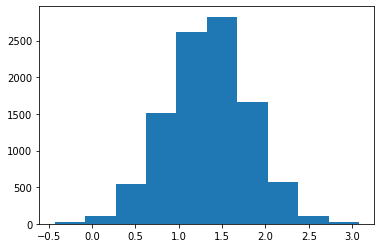

In [33]:
diff = []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_coff = bootsample.query('drinks_coffee').height.mean()
    mean_nocoff = bootsample.query('drinks_coffee == False').height.mean()
    diff.append(mean_coff - mean_nocoff)

plt.hist(diff);

In [34]:
np.percentile(diff, 0.5), np.percentile(diff, 99.5)

(0.10258900080919674, 2.5388333707966284)

2. For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21. Build a 99% confidence interval using your sampling distribution. Use your interval to finish answering the first quiz question below.

In [35]:
# age comparison
bootsample = sample_data.sample(200, replace=True)
older = bootsample.query('age == ">=21"').height.mean()
younger = bootsample.query('age == "<21"').height.mean()
older - younger

3.7289924361174656

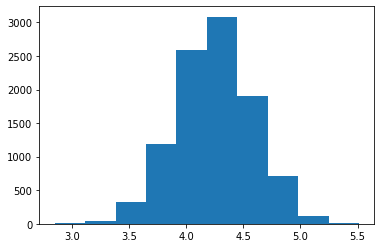

In [36]:
age_diff = []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    older = bootsample.query('age == ">=21"').height.mean()
    younger = bootsample.query('age == "<21"').height.mean()
    age_diff.append(older - younger)

plt.hist(age_diff);

In [37]:
np.percentile(age_diff, 0.5), np.percentile(age_diff, 99.5)

(3.365274945255409, 5.093245067066094)

3. For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals under 21 years old. Using your sampling distribution, build a 95% confidence interval. Use your interval to start answering question 2 below.

In [38]:
# coff and no coff for younger ones
bootsample = sample_data.sample(200, replace=True)
age_coff = bootsample.query('age == "<21" and drinks_coffee').height.mean()
age_nocoff = bootsample.query('age == "<21" and drinks_coffee == False').height.mean()
age_coff - age_nocoff

-1.996349060854783

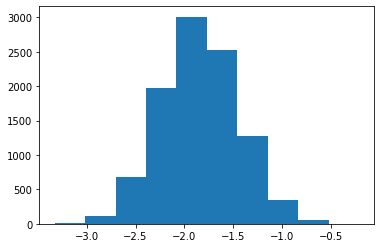

In [39]:
age_coff_diff = []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    age_coff = bootsample.query('age == "<21" and drinks_coffee').height.mean()
    age_nocoff = bootsample.query('age == "<21" and drinks_coffee == False').height.mean()
    age_coff_diff.append(age_coff - age_nocoff)
plt.hist(age_coff_diff);

In [40]:
np.percentile(age_coff_diff, 0.25), np.percentile(age_coff_diff, 97.5)

(-2.9180504980189137, -1.0593651244624338)

4. For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals over 21 years old. Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions.

In [41]:
bootsample = sample_data.sample(200, replace=True)
age_coff = bootsample.query('age == ">=21" and drinks_coffee').height.mean()
age_nocoff = bootsample.query('age == ">=21" and drinks_coffee == False').height.mean()
age_coff - age_nocoff

-3.138036625573193

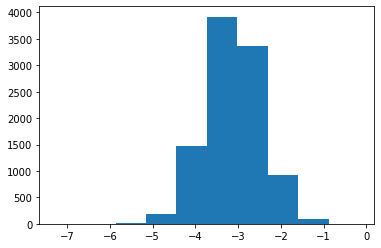

In [42]:
age_coff_diff = []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    age_coff = bootsample.query('age == ">=21" and drinks_coffee').height.mean()
    age_nocoff = bootsample.query('age == ">=21" and drinks_coffee == False').height.mean()
    age_coff_diff.append(age_coff - age_nocoff)
plt.hist(age_coff_diff);

In [43]:
np.percentile(age_coff_diff, 0.25), np.percentile(age_coff_diff, 97.5)

(-5.046981358187855, -1.8278953970884224)